<a href="https://colab.research.google.com/github/HarTigran/Exploring-d3rlpy/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AIPI_590/HW_3

/content/drive/MyDrive/AIPI_590/HW_3


In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install d3rlpy
!pip install gym[all]

In [5]:
from d3rlpy.datasets import get_cartpole
import pandas as pd
import matplotlib.pyplot as plt

# get CartPole dataset
dataset, env = get_cartpole()

/usr/local/lib/python3.7/dist-packages/h5py/_hl/dataset.py:767: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:594: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: Depre

In [6]:
from d3rlpy.algos import DiscreteCQL
from d3rlpy.metrics.scorer import discounted_sum_of_advantage_scorer
from d3rlpy.metrics.scorer import evaluate_on_environment
from d3rlpy.metrics.scorer import td_error_scorer
from d3rlpy.metrics.scorer import average_value_estimation_scorer
from sklearn.model_selection import train_test_split
from d3rlpy.metrics.scorer import initial_state_value_estimation_scorer

# setup CQL algorithm
cql = DiscreteCQL(use_gpu=False)

# split train and test episodes
train_episodes, test_episodes = train_test_split(dataset, test_size=0.2)

# start training
cql.fit(train_episodes,
        eval_episodes=test_episodes,
        n_epochs=30,
        scorers={
            'environment': evaluate_on_environment(env), # evaluate with CartPol-v0 environment
            'advantage': discounted_sum_of_advantage_scorer, # smaller is better
            'td_error': td_error_scorer, # smaller is better
            'value_scale': average_value_estimation_scorer, # Estimated Q
            'initial_value_scale': initial_state_value_estimation_scorer # True Q
        })

2022-11-02 02:41.48 [debug    ] RoundIterator is selected.
2022-11-02 02:41.48 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20221102024148
2022-11-02 02:41.48 [debug    ] Building models...
2022-11-02 02:41.48 [debug    ] Models have been built.
2022-11-02 02:41.48 [info     ] Parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DiscreteCQL', 'observation

Epoch 1/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:42.04 [info     ] DiscreteCQL_20221102024148: epoch=1 step=2475 epoch=1 metrics={'time_sample_batch': 0.00012687008790295532, 'time_algorithm_update': 0.004590650616270123, 'loss': 0.6902019220891625, 'time_step': 0.0048472791729551375, 'environment': 200.0, 'advantage': -2.944068630026101, 'td_error': 1.1644918532673476, 'value_scale': 1.115333985042256, 'initial_value_scale': 1.038914680480957} step=2475
2022-11-02 02:42.04 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_2475.pt


Epoch 2/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:42.19 [info     ] DiscreteCQL_20221102024148: epoch=2 step=4950 epoch=2 metrics={'time_sample_batch': 0.00012407813409362177, 'time_algorithm_update': 0.0044710902975063135, 'loss': 0.6697412947693256, 'time_step': 0.004692931030735825, 'environment': 200.0, 'advantage': -3.0095581509613147, 'td_error': 1.1623520244198746, 'value_scale': 1.1310254687760626, 'initial_value_scale': 1.041249394416809} step=4950
2022-11-02 02:42.19 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_4950.pt


Epoch 3/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:42.34 [info     ] DiscreteCQL_20221102024148: epoch=3 step=7425 epoch=3 metrics={'time_sample_batch': 0.00012463107253565933, 'time_algorithm_update': 0.00449175709425801, 'loss': 0.6680157634465381, 'time_step': 0.004721960684265753, 'environment': 192.8, 'advantage': -3.6619437655548617, 'td_error': 1.1971034633654591, 'value_scale': 1.1046297530676057, 'initial_value_scale': 1.0236716270446777} step=7425
2022-11-02 02:42.34 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_7425.pt


Epoch 4/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:42.51 [info     ] DiscreteCQL_20221102024148: epoch=4 step=9900 epoch=4 metrics={'time_sample_batch': 0.0001271319148516414, 'time_algorithm_update': 0.004814271348895448, 'loss': 0.6776837971957043, 'time_step': 0.005068027708265517, 'environment': 200.0, 'advantage': -3.303268185491559, 'td_error': 1.1750527702588736, 'value_scale': 2.184309679007709, 'initial_value_scale': 2.0758795738220215} step=9900
2022-11-02 02:42.51 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_9900.pt


Epoch 5/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:43.06 [info     ] DiscreteCQL_20221102024148: epoch=5 step=12375 epoch=5 metrics={'time_sample_batch': 0.0001256965868400805, 'time_algorithm_update': 0.004494664355961964, 'loss': 0.676331204597396, 'time_step': 0.0047272971182158495, 'environment': 200.0, 'advantage': -2.9900607182146537, 'td_error': 1.1436809992370796, 'value_scale': 2.1476912706279725, 'initial_value_scale': 2.0665690898895264} step=12375
2022-11-02 02:43.06 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_12375.pt


Epoch 6/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:43.21 [info     ] DiscreteCQL_20221102024148: epoch=6 step=14850 epoch=6 metrics={'time_sample_batch': 0.0001197453701134884, 'time_algorithm_update': 0.004477426066543117, 'loss': 0.6755920792589284, 'time_step': 0.004696851788145123, 'environment': 200.0, 'advantage': -3.1456852744872843, 'td_error': 1.1500694625303236, 'value_scale': 2.1743178726335106, 'initial_value_scale': 2.0830509662628174} step=14850
2022-11-02 02:43.21 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_14850.pt


Epoch 7/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:43.37 [info     ] DiscreteCQL_20221102024148: epoch=7 step=17325 epoch=7 metrics={'time_sample_batch': 0.00012120449181758996, 'time_algorithm_update': 0.004582407594931246, 'loss': 0.6855388980441623, 'time_step': 0.004810616560656615, 'environment': 200.0, 'advantage': -3.3276141811738817, 'td_error': 1.1835063203734892, 'value_scale': 3.2695863280389768, 'initial_value_scale': 3.172584056854248} step=17325
2022-11-02 02:43.37 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_17325.pt


Epoch 8/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:43.53 [info     ] DiscreteCQL_20221102024148: epoch=8 step=19800 epoch=8 metrics={'time_sample_batch': 0.00012105392687248461, 'time_algorithm_update': 0.0045068646440602315, 'loss': 0.6887982827003556, 'time_step': 0.004742004702789615, 'environment': 200.0, 'advantage': -3.4013383467167686, 'td_error': 1.1873485224253022, 'value_scale': 3.245336054674747, 'initial_value_scale': 3.150670289993286} step=19800
2022-11-02 02:43.53 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_19800.pt


Epoch 9/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:44.11 [info     ] DiscreteCQL_20221102024148: epoch=9 step=22275 epoch=9 metrics={'time_sample_batch': 0.0001366287770897451, 'time_algorithm_update': 0.004936413427796027, 'loss': 0.68831123999875, 'time_step': 0.005193362862172753, 'environment': 163.7, 'advantage': -3.7447457826102464, 'td_error': 1.2029051550870937, 'value_scale': 3.230921626951049, 'initial_value_scale': 3.1499829292297363} step=22275
2022-11-02 02:44.11 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_22275.pt


Epoch 10/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:44.28 [info     ] DiscreteCQL_20221102024148: epoch=10 step=24750 epoch=10 metrics={'time_sample_batch': 0.00013844653813525884, 'time_algorithm_update': 0.005081306707979453, 'loss': 0.6942472413573603, 'time_step': 0.005352021419640743, 'environment': 164.3, 'advantage': -3.5554630840914068, 'td_error': 1.2289359963863022, 'value_scale': 4.285850453297739, 'initial_value_scale': 4.216175556182861} step=24750
2022-11-02 02:44.28 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_24750.pt


Epoch 11/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:44.44 [info     ] DiscreteCQL_20221102024148: epoch=11 step=27225 epoch=11 metrics={'time_sample_batch': 0.00012116827145971433, 'time_algorithm_update': 0.004539547929860124, 'loss': 0.7002810460630089, 'time_step': 0.004777626076129952, 'environment': 200.0, 'advantage': -3.5762300531949345, 'td_error': 1.2333907531860384, 'value_scale': 4.27717757019323, 'initial_value_scale': 4.1986565589904785} step=27225
2022-11-02 02:44.44 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_27225.pt


Epoch 12/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:45.03 [info     ] DiscreteCQL_20221102024148: epoch=12 step=29700 epoch=12 metrics={'time_sample_batch': 0.00012471333898679175, 'time_algorithm_update': 0.0045398898076529455, 'loss': 0.699755908961248, 'time_step': 0.004784607164787524, 'environment': 200.0, 'advantage': -3.410886885127887, 'td_error': 1.222515776757784, 'value_scale': 4.261199499973372, 'initial_value_scale': 4.17947244644165} step=29700
2022-11-02 02:45.03 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_29700.pt


Epoch 13/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:45.24 [info     ] DiscreteCQL_20221102024148: epoch=13 step=32175 epoch=13 metrics={'time_sample_batch': 0.0002051323592060744, 'time_algorithm_update': 0.006120318114155471, 'loss': 0.7023963467039244, 'time_step': 0.006469383721399789, 'environment': 145.4, 'advantage': -4.113009431972918, 'td_error': 1.3236303854226321, 'value_scale': 5.30792269265546, 'initial_value_scale': 5.25070858001709} step=32175
2022-11-02 02:45.24 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_32175.pt


Epoch 14/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:45.42 [info     ] DiscreteCQL_20221102024148: epoch=14 step=34650 epoch=14 metrics={'time_sample_batch': 0.00015371447861796676, 'time_algorithm_update': 0.005187360397492996, 'loss': 0.7121527238084813, 'time_step': 0.005485259065724383, 'environment': 200.0, 'advantage': -3.6187175609312265, 'td_error': 1.3026039651626382, 'value_scale': 5.2887102681037526, 'initial_value_scale': 5.2066168785095215} step=34650
2022-11-02 02:45.42 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_34650.pt


Epoch 15/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:46.00 [info     ] DiscreteCQL_20221102024148: epoch=15 step=37125 epoch=15 metrics={'time_sample_batch': 0.0001462224517205749, 'time_algorithm_update': 0.005198849475744999, 'loss': 0.7116652361792748, 'time_step': 0.005490694912997159, 'environment': 200.0, 'advantage': -3.4813330805471376, 'td_error': 1.2811536435871385, 'value_scale': 5.296757020459394, 'initial_value_scale': 5.229583740234375} step=37125
2022-11-02 02:46.00 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_37125.pt


Epoch 16/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:46.16 [info     ] DiscreteCQL_20221102024148: epoch=16 step=39600 epoch=16 metrics={'time_sample_batch': 0.00014143664427477903, 'time_algorithm_update': 0.004773372014363606, 'loss': 0.7112103195142264, 'time_step': 0.005052604000977796, 'environment': 200.0, 'advantage': -3.5234338415840702, 'td_error': 1.2782608900599468, 'value_scale': 5.314043988025803, 'initial_value_scale': 5.240511417388916} step=39600
2022-11-02 02:46.16 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_39600.pt


Epoch 17/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:46.32 [info     ] DiscreteCQL_20221102024148: epoch=17 step=42075 epoch=17 metrics={'time_sample_batch': 0.00013095913511334043, 'time_algorithm_update': 0.004729419091735223, 'loss': 0.7236652291182316, 'time_step': 0.0049908147677026615, 'environment': 200.0, 'advantage': -3.2253297143696154, 'td_error': 1.3470197928887984, 'value_scale': 6.288502688806308, 'initial_value_scale': 6.225246429443359} step=42075
2022-11-02 02:46.32 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_42075.pt


Epoch 18/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:46.51 [info     ] DiscreteCQL_20221102024148: epoch=18 step=44550 epoch=18 metrics={'time_sample_batch': 0.00015620771080556543, 'time_algorithm_update': 0.005497835236366349, 'loss': 0.723353235962415, 'time_step': 0.005790832981918797, 'environment': 200.0, 'advantage': -3.872517063856432, 'td_error': 1.39238749581046, 'value_scale': 6.307699122623683, 'initial_value_scale': 6.233771324157715} step=44550
2022-11-02 02:46.51 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_44550.pt


Epoch 19/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:47.10 [info     ] DiscreteCQL_20221102024148: epoch=19 step=47025 epoch=19 metrics={'time_sample_batch': 0.0001572327661995936, 'time_algorithm_update': 0.005429247750176324, 'loss': 0.7227821936029376, 'time_step': 0.005734567834873392, 'environment': 200.0, 'advantage': -3.526497383706703, 'td_error': 1.3615942673456765, 'value_scale': 6.310736027286452, 'initial_value_scale': 6.241584300994873} step=47025
2022-11-02 02:47.10 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_47025.pt


Epoch 20/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:47.31 [info     ] DiscreteCQL_20221102024148: epoch=20 step=49500 epoch=20 metrics={'time_sample_batch': 0.0001933515914762863, 'time_algorithm_update': 0.00627085232975507, 'loss': 0.7313132160841816, 'time_step': 0.006634353387235391, 'environment': 187.7, 'advantage': -3.8641615383167824, 'td_error': 1.4773612757303032, 'value_scale': 7.324174477224916, 'initial_value_scale': 7.288982391357422} step=49500
2022-11-02 02:47.31 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_49500.pt


Epoch 21/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:47.52 [info     ] DiscreteCQL_20221102024148: epoch=21 step=51975 epoch=21 metrics={'time_sample_batch': 0.0001996806173613577, 'time_algorithm_update': 0.005854160713426994, 'loss': 0.7334965681307244, 'time_step': 0.006221767290674075, 'environment': 200.0, 'advantage': -3.6359275238140203, 'td_error': 1.4669974489996305, 'value_scale': 7.325945782408073, 'initial_value_scale': 7.280727863311768} step=51975
2022-11-02 02:47.52 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_51975.pt


Epoch 22/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:48.11 [info     ] DiscreteCQL_20221102024148: epoch=22 step=54450 epoch=22 metrics={'time_sample_batch': 0.00019092502016009705, 'time_algorithm_update': 0.0056711134284433695, 'loss': 0.7327161898516645, 'time_step': 0.0060258849943527065, 'environment': 200.0, 'advantage': -3.6783434448067323, 'td_error': 1.4600468956887798, 'value_scale': 7.305241496472072, 'initial_value_scale': 7.245031833648682} step=54450
2022-11-02 02:48.11 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_54450.pt


Epoch 23/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:48.28 [info     ] DiscreteCQL_20221102024148: epoch=23 step=56925 epoch=23 metrics={'time_sample_batch': 0.00013810629796500159, 'time_algorithm_update': 0.0050042554103966914, 'loss': 0.7374832874596721, 'time_step': 0.005277450927580246, 'environment': 200.0, 'advantage': -4.192362309642597, 'td_error': 1.6108460958629043, 'value_scale': 8.300783736903126, 'initial_value_scale': 8.242193222045898} step=56925
2022-11-02 02:48.28 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_56925.pt


Epoch 24/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:48.45 [info     ] DiscreteCQL_20221102024148: epoch=24 step=59400 epoch=24 metrics={'time_sample_batch': 0.00013898502696644177, 'time_algorithm_update': 0.004975832736853397, 'loss': 0.7421937920348813, 'time_step': 0.005252988410718513, 'environment': 200.0, 'advantage': -3.5076288328636958, 'td_error': 1.5525353517831155, 'value_scale': 8.282208426997968, 'initial_value_scale': 8.246857643127441} step=59400
2022-11-02 02:48.45 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_59400.pt


Epoch 25/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:49.09 [info     ] DiscreteCQL_20221102024148: epoch=25 step=61875 epoch=25 metrics={'time_sample_batch': 0.0002220201010655875, 'time_algorithm_update': 0.007285534829804392, 'loss': 0.741650265563618, 'time_step': 0.007721541818946299, 'environment': 200.0, 'advantage': -3.5553056179720963, 'td_error': 1.5437062707063356, 'value_scale': 8.272911779711071, 'initial_value_scale': 8.241765975952148} step=61875
2022-11-02 02:49.09 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_61875.pt


Epoch 26/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:49.26 [info     ] DiscreteCQL_20221102024148: epoch=26 step=64350 epoch=26 metrics={'time_sample_batch': 0.0001402921387643525, 'time_algorithm_update': 0.0048624507826988145, 'loss': 0.744285128935419, 'time_step': 0.005131798657503995, 'environment': 200.0, 'advantage': -3.6862274776616033, 'td_error': 1.694412176235871, 'value_scale': 9.294085989735727, 'initial_value_scale': 9.270763397216797} step=64350
2022-11-02 02:49.26 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_64350.pt


Epoch 27/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:49.43 [info     ] DiscreteCQL_20221102024148: epoch=27 step=66825 epoch=27 metrics={'time_sample_batch': 0.0001579842422947739, 'time_algorithm_update': 0.0050738684336344405, 'loss': 0.7515453736468999, 'time_step': 0.00537441195863666, 'environment': 200.0, 'advantage': -4.068145815299971, 'td_error': 1.7096021689210903, 'value_scale': 9.282624878590017, 'initial_value_scale': 9.239215850830078} step=66825
2022-11-02 02:49.43 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_66825.pt


Epoch 28/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:50.02 [info     ] DiscreteCQL_20221102024148: epoch=28 step=69300 epoch=28 metrics={'time_sample_batch': 0.00015827361983482283, 'time_algorithm_update': 0.00525542711970782, 'loss': 0.7509042036051702, 'time_step': 0.005570198020549736, 'environment': 200.0, 'advantage': -3.776369251605255, 'td_error': 1.6809247286415165, 'value_scale': 9.284213313143354, 'initial_value_scale': 9.266678810119629} step=69300
2022-11-02 02:50.02 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_69300.pt


Epoch 29/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:50.21 [info     ] DiscreteCQL_20221102024148: epoch=29 step=71775 epoch=29 metrics={'time_sample_batch': 0.00016214399626760773, 'time_algorithm_update': 0.0057402018344763555, 'loss': 0.7505110744033197, 'time_step': 0.006085134949346985, 'environment': 200.0, 'advantage': -3.5615181517486296, 'td_error': 1.653935722132677, 'value_scale': 9.28449627559785, 'initial_value_scale': 9.2613525390625} step=71775
2022-11-02 02:50.21 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_71775.pt


Epoch 30/30:   0%|          | 0/2475 [00:00<?, ?it/s]

2022-11-02 02:50.38 [info     ] DiscreteCQL_20221102024148: epoch=30 step=74250 epoch=30 metrics={'time_sample_batch': 0.00013647204697734178, 'time_algorithm_update': 0.005080281748916163, 'loss': 0.760714089701874, 'time_step': 0.0053579037598889285, 'environment': 200.0, 'advantage': -4.026093841677239, 'td_error': 1.8328929057711985, 'value_scale': 10.287970247354217, 'initial_value_scale': 10.27351188659668} step=74250
2022-11-02 02:50.38 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20221102024148/model_74250.pt


[(1,
  {'time_sample_batch': 0.00012687008790295532,
   'time_algorithm_update': 0.004590650616270123,
   'loss': 0.6902019220891625,
   'time_step': 0.0048472791729551375,
   'environment': 200.0,
   'advantage': -2.944068630026101,
   'td_error': 1.1644918532673476,
   'value_scale': 1.115333985042256,
   'initial_value_scale': 1.038914680480957}),
 (2,
  {'time_sample_batch': 0.00012407813409362177,
   'time_algorithm_update': 0.0044710902975063135,
   'loss': 0.6697412947693256,
   'time_step': 0.004692931030735825,
   'environment': 200.0,
   'advantage': -3.0095581509613147,
   'td_error': 1.1623520244198746,
   'value_scale': 1.1310254687760626,
   'initial_value_scale': 1.041249394416809}),
 (3,
  {'time_sample_batch': 0.00012463107253565933,
   'time_algorithm_update': 0.00449175709425801,
   'loss': 0.6680157634465381,
   'time_step': 0.004721960684265753,
   'environment': 192.8,
   'advantage': -3.6619437655548617,
   'td_error': 1.1971034633654591,
   'value_scale': 1.1046

In [7]:
%cd /content/drive/MyDrive/AIPI_590/HW_3/d3rlpy_logs/DiscreteCQL_20221102024148

/content/drive/MyDrive/AIPI_590/HW_3/d3rlpy_logs/DiscreteCQL_20221102024148


In [10]:
# Load Saved Scores
df_initial_value_scale = pd.read_csv('initial_value_scale.csv', header=None)
df_value_scale = pd.read_csv('value_scale.csv', header=None)
df_environment = pd.read_csv('environment.csv', header=None)

In [11]:
# List of models
model_lst = [i for i in df_environment.iloc[:,1]]

In [12]:
# Calculating true Q value for each epoch

q_value_lst = []
for i in model_lst:
  cql = DiscreteCQL(use_gpu=False)
  cql.build_with_dataset(dataset)
  cql.load_model(f'model_{i}.pt')
  observation = env.reset()
  action = cql.predict([observation])[0]
  value = cql.predict_value([observation], [action])[0]
  q_value_lst.append(value)

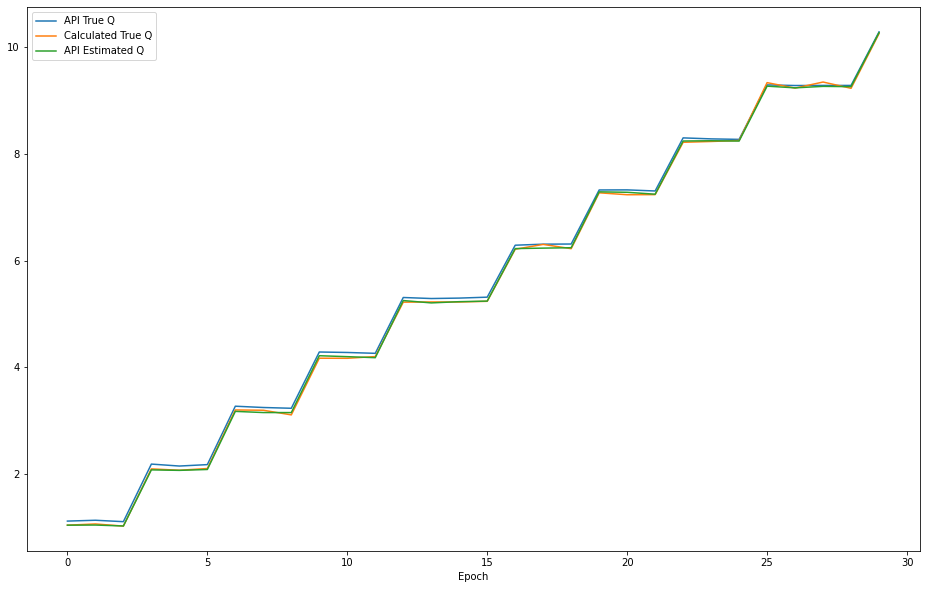

In [14]:
# Plotting Q estimated and true values
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(df_value_scale.iloc[:,2], label = 'API True Q')
ax.plot(q_value_lst, label = 'Calculated True Q')
ax.plot(df_initial_value_scale.iloc[:,2], label = 'API Estimated Q')
ax.set_xlabel("Epoch")
ax.legend()
plt.show()